<a href="https://colab.research.google.com/github/DKowarsch/Business-Analytics/blob/MGMT566/Copy_of_Final_Project_using_Logistics_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
#from sklearn.datasets import load_iris
from sklearn import tree
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import seaborn as sns
#plt.style.use('ggplot')


### How to import a csv to colab

In [3]:
from google.colab import files
uploaded = files.upload()

Saving INNHotelsGroup_bookingCancellationPred.csv to INNHotelsGroup_bookingCancellationPred.csv


In [4]:
#read file by the file's name
df = pd.read_csv("INNHotelsGroup_bookingCancellationPred.csv")

### Display the top 10 record of the dataset

In [5]:
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


### Print a Descriptive Table

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


### Interesting in data type and dataset dimentions

In [7]:
## data dimentions
shape = df.shape
print(f'dataset dim is {shape}')
# print an empty line
print()
# data types using dtypes
df.dtypes

dataset dim is (36275, 19)



Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [ ]:
df['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [9]:
#select the numerical attributes

attributes = ['lead_time','repeated_guest','avg_price_per_room','no_of_children','no_of_weekend_nights','no_of_previous_bookings_not_canceled']

In [ ]:
df['booking_status'] = df['booking_status'].replace({'Canceled': 1, 'Not_Canceled': 0})


In [ ]:
### EDA

In [ ]:
# check column names
df.columns

Index(['EmployeeNumber', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<Axes: >

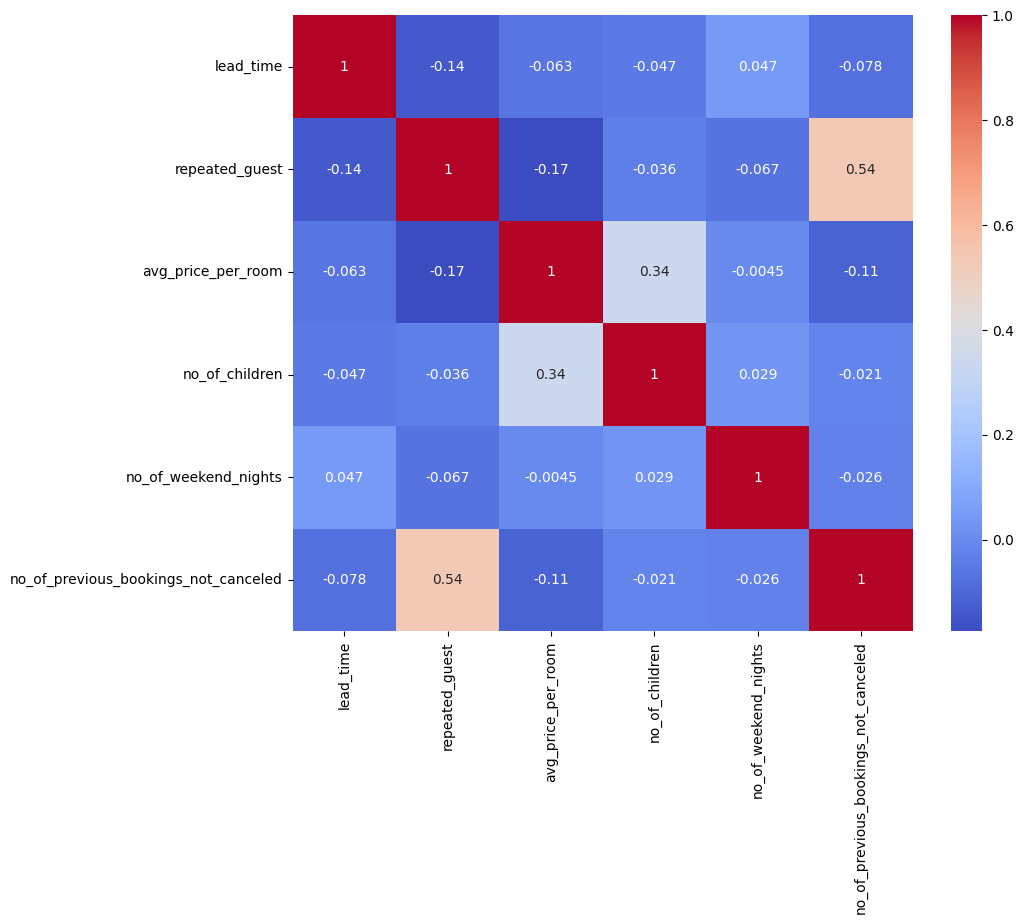

In [10]:
#heatmap
plt.figure(figsize=(10,8))
c= df[attributes].corr()
sns.heatmap(c,cmap='coolwarm',annot=True)


In [25]:
#small model that only includes one attribute
X= df[['lead_time']]
y=df['booking_status']
logr_small = linear_model.LogisticRegression()
logr_small.fit(X,y)

LogisticRegression()

In [29]:
#full model that includes all the attributes

X_full= df[attributes]
logr = linear_model.LogisticRegression()
logr.fit(X_full,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
# Make predictions using all attributes
y_pred = logr.predict(X_full)

# Compute confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 5477  6408]
 [ 2401 21989]]


In [32]:
# the result using only one attribute
y_pred_s= logr_small.predict(X)

# Compute confusion matrix
conf_matrix_s = confusion_matrix(y, y_pred_s)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 5477  6408]
 [ 2401 21989]]


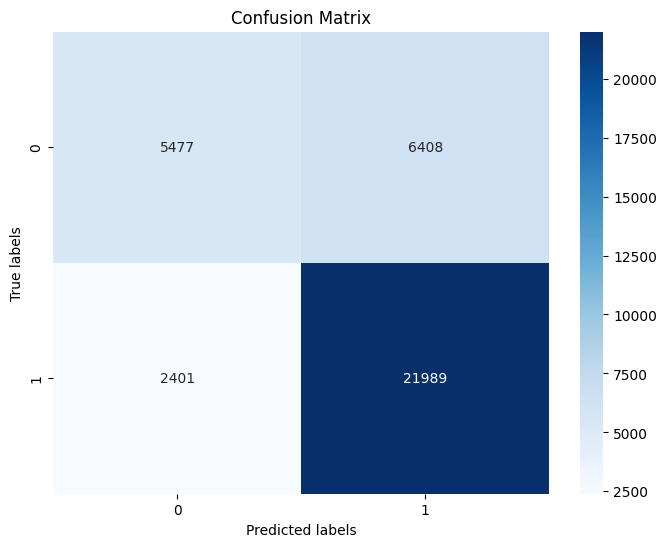

In [15]:
# visual for the full model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [35]:
# Compute classification report of the full model
report = classification_report(y, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

    Canceled       0.70      0.46      0.55     11885
Not_Canceled       0.77      0.90      0.83     24390

    accuracy                           0.76     36275
   macro avg       0.73      0.68      0.69     36275
weighted avg       0.75      0.76      0.74     36275



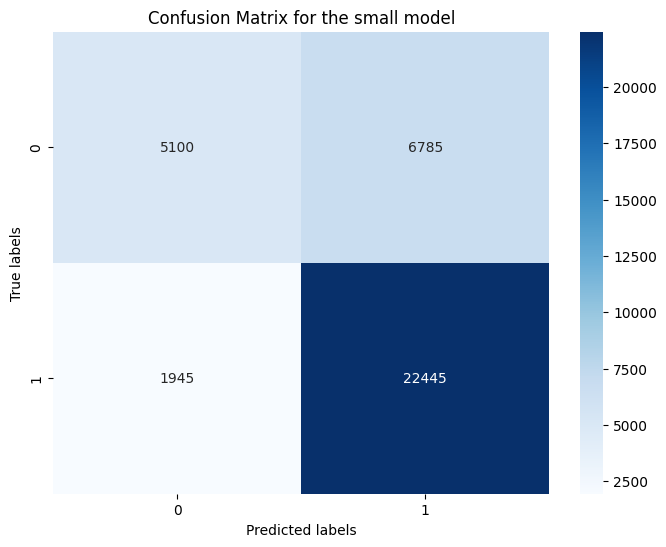

In [33]:
# chart of the small model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_s, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for the small model')
plt.show()

In [34]:
# Compute classification report of the small model
report = classification_report(y, y_pred_s)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

    Canceled       0.72      0.43      0.54     11885
Not_Canceled       0.77      0.92      0.84     24390

    accuracy                           0.76     36275
   macro avg       0.75      0.67      0.69     36275
weighted avg       0.75      0.76      0.74     36275

